<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">MLG Ratones con cancer de vejiga </h2>

### Oscar Julian Layton

Estos datos, extraídos de Zhang y Zelterman (1999) y presentados en la siguientes tabla, surgen de un experimento donde grupos de ratones hembra que fueron alimentados con dosis muy bajas de 2-acetilaminofluoreno, un derivado carcinógeno y mutagénico
del fluoreno. Luego de la exposición al 2-acetilaminofluoreno los ratones se examinaron en busca de tumores y se registro el número de casos de cáncer (de **higado** y **vejiga**). 

* **Dosis**
* **Expuestos**
* **Enfermos**

In [ ]:
#rm(list=ls())
getwd()
setwd("")  #Asignando capeta busqueda por default
source("macros.txt")           # Llamar el archivo de macros que esta en la carpeta especifica,
                               # macros son una fuciines especificas creadas porel profesor

In [59]:
library("tidyverse")
higado <- structure(list(dosis = c(0.00,0.30,0.35,0.45,0.60,0.75,1.00,1.50)
                    , n_h = c(555,2014,1102,550,441,382,213,211)
                    , y_h = c(6,34,20,15,13,17,19,24))
                    , .Names = c("Dosis", "Expuestos", "Enfermos")
                    , row.names = c(NA, -8L), class = "data.frame")
attach(higado)
vejiga <- structure(list(dosis = c(0.00,0.30,0.35,0.45,0.60,0.75,1.00,1.50)
                    , n_v = c(101,443,200,103,66,75,31,11)
                    , y_v = c(1,5,0,2,2,12,21,11))
                    , .Names = c("Dosisv", "Expuestosv", "Enfermosv")
                    , row.names = c(NA, -8L), class = "data.frame")
attach(vejiga)
a <- 0.05
data_v <-vejiga %>% mutate(p = ifelse(Enfermosv/Expuestosv == 0 |
     Enfermosv/Expuestosv == 1 ,
     abs(Enfermosv/Expuestosv-a/Expuestosv),
    Enfermosv/Expuestosv))

The following objects are masked from higado (pos = 4):

    Dosis, Enfermos, Expuestos

The following objects are masked from higado (pos = 6):

    Dosis, Enfermos, Expuestos

The following objects are masked from higado (pos = 8):

    Dosis, Enfermos, Expuestos

The following objects are masked from vejiga (pos = 4):

    Dosisv, Enfermosv, Expuestosv

The following objects are masked from vejiga (pos = 6):

    Dosisv, Enfermosv, Expuestosv

The following objects are masked from vejiga (pos = 8):

    Dosisv, Enfermosv, Expuestosv



In [60]:
higado;vejiga

Dosis,Expuestos,Enfermos
0.00,555,6
0.30,2014,34
0.35,1102,20
0.45,550,15
0.60,441,13
0.75,382,17
1.00,213,19
1.50,211,24


Dosisv,Expuestosv,Enfermosv
0.00,101,1
0.30,443,5
0.35,200,0
0.45,103,2
0.60,66,2
0.75,75,12
1.00,31,21
1.50,11,11


 * **a)** Analice los datos para cada tipo de cáncer separadamente. Ajuste a los datos modelos de respuesta binomial con funciones de enlace logit, probit, complemento log-log y Cauchy. Use los criterios AIC, BIC y $R_{D}^2$  para comparar y seleccionar el “mejor” modelo para cada tipo de cáncer

Denotemos por $Y_k$ la variable aleatoria que mide la proporción de ratones que presentan cáncer después de recibir cierta dosis de 2-acetilaminofluoreno, con $k = 1, · · · , 8$, entonces:

$$m_k Y_k \; \sim \; Bin(m_k, µ_k)$$

Donde $m_k$ es el número de ratones hembra que fueron expuestros al derivado del fluoreno. Sí $Y_1, · · · , Y_8$ son independientes y $\mu_k$ depende de la dosis $x_k$ a través de la función $g(.)$, considerando las funciones de enlace logit, probit, complemento log-log y Cauchy, se ajustan los siguientes modelos:

In [85]:
#-------------------Higado----------------------------------------------------------------
#logit_h
fit1<- glm(Enfermos/Expuestos ~ Dosis, weights = Expuestos, family =binomial(link = "logit"))

#probit_h
fit2<- glm(Enfermos/Expuestos ~ Dosis, weights = Expuestos, family =binomial(link = "probit"))

#loglog_h
fit3<- glm(Enfermos/Expuestos ~ Dosis, weights = Expuestos, family =binomial(link = "cloglog"))
#cloglog es complementary loglog

#cauchy_h
fit4<- glm(Enfermos/Expuestos ~ Dosis, weights = Expuestos, family =binomial(link = "cauchit"))

#AIC(fit1,fit2,fit3,fit4)
#BIC(fit1,fit2,fit3,fit4)
#gof_glm(fit1)
#gof_glm(fit2)
#gof_glm(fit3)
#gof_glm(fit4)


In [62]:
BIC(fit1,fit2,fit3,fit4)

,df,BIC
fit1,2,45.65330
fit2,2,44.64968
fit3,2,45.90280
fit4,2,57.65330


###  Selección del modelo mediante BIC

Para los modelos ajustados en los individuos que presentarón cáncer de higado, se tiene que el BIC del modelo con mejor calidad de ajuste es fit2, es decir el modelo con link probit.

Para los datos que hacen referentia a cáncer de vejiga se realiza el ajuste para los modelos binomiales con diferentes funciones de enlace se tiene:

In [88]:
#--------------------------Vejiga--------------------------------------------------------------
#logit_v
fit11<- glm(Enfermosv/Expuestosv ~ Dosisv, weights = Expuestosv, family =binomial(link = "logit"))

#probit_v
fit21<- glm(Enfermosv/Expuestosv ~ Dosisv, weights = Expuestosv, family =binomial(link = "probit"))

#loglog_v
fit31<- glm(Enfermosv/Expuestosv ~ Dosisv, weights = Expuestosv, family =binomial(link = "cloglog"))
#cloglog es complementary loglog, que pasa con el 0...

#cauchy_v
fit41<- glm(Enfermosv/Expuestosv ~ Dosisv, weights = Expuestosv, family =binomial(link = "cauchit"))

#AIC(fit11,fit21,fit31,fit41)
BIC(fit11,fit21,fit31,fit41)
#gof_glm(fit11)
#gof_glm(fit21)
#gof_glm(fit31) #mayor
#gof_glm(fit41)
#Tanto por el críterio del AIC,BIC, R^2_D, el modelo seleccionado es fit31


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,df,BIC
fit11,2,34.17801
fit21,2,41.97665
fit31,2,32.12375
fit41,2,43.66368


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

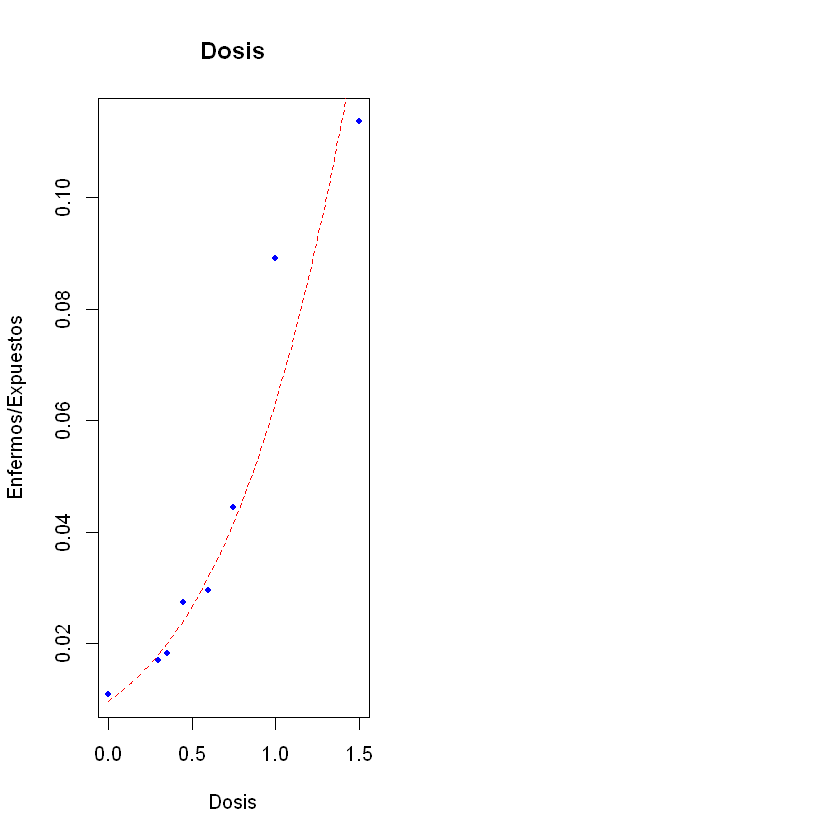

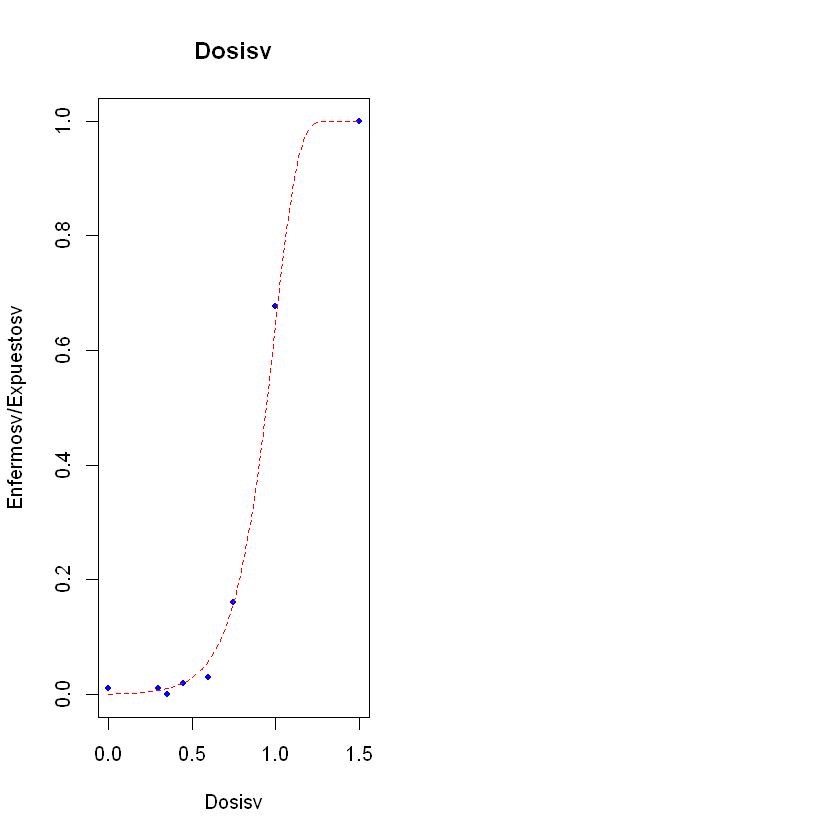

In [104]:
require(sqldf)

par(mfrow=c(2,2))
a<-graphs_glm(fit.model =fit2,a=1,b=2,col = "blue" ,ngroup=30) 
b<-graphs_glm(fit.model =fit31,a=1,b=2,col = "blue" ,ngroup=30)

Se tiene que el BIC del modelo con mejor calidad de ajuste es fit31, es decir el modelo con link cloglog.

# gráficos

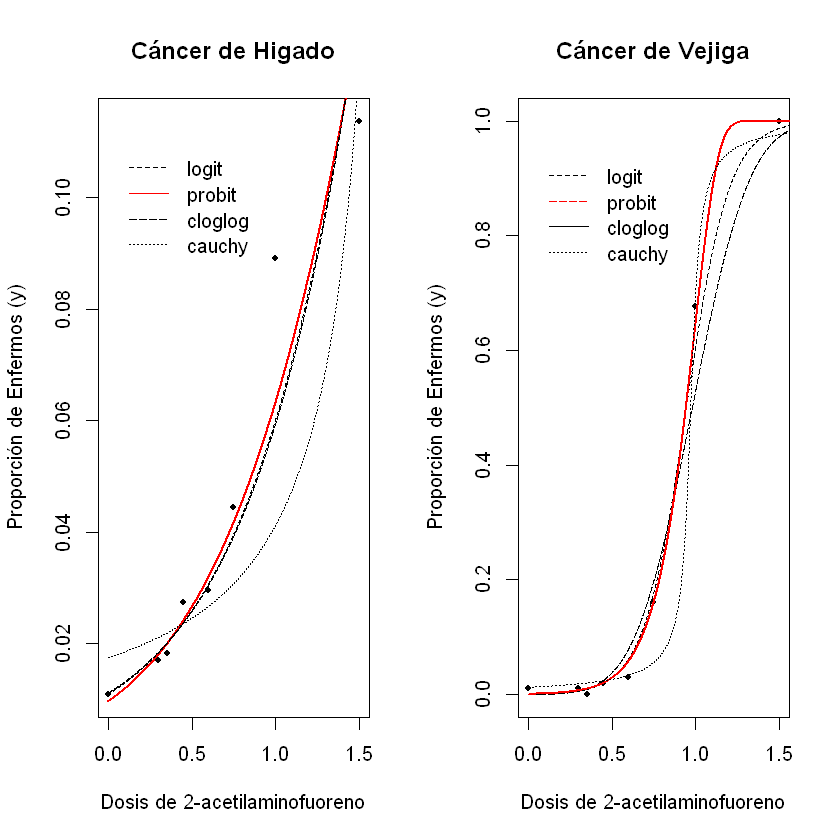

In [64]:
xdosis <- seq(0, 1.9, 0.001)
ydosis1 <- predict(fit1, list(Dosis=xdosis),type="response")
ydosis2 <- predict(fit2, list(Dosis=xdosis),type="response")
ydosis3 <- predict(fit3, list(Dosis=xdosis),type="response")
ydosis4 <- predict(fit4, list(Dosis=xdosis),type="response")

par(mfrow=c(1,2))
{plot(Dosis, Enfermos/Expuestos, pch=20, xlab = "Dosis de 2-acetilaminofuoreno", ylab = "Proporción de Enfermos (y)",
      title(main ="Cáncer de Higado"))}
lines(xdosis, ydosis2 , col="red",lwd=2)
lines(xdosis, ydosis1, lty =2)
lines(xdosis, ydosis3, lty=5)
lines(xdosis, ydosis4, lty =3)



legend(0.01,0.11,box.lty=0,legend=c("logit","probit","cloglog","cauchy"),lty=c(2,1,5,3),col=c("black","red","black","black"))
ydosis11 <- predict.glm(fit11, list(Dosisv=xdosis),type="response")
ydosis21 <- predict.glm(fit21, list(Dosisv=xdosis),type="response")
ydosis31 <- predict.glm(fit31, list(Dosisv=xdosis),type="response")
ydosis41 <- predict.glm(fit41, list(Dosisv=xdosis),type="response")


{plot(Dosisv, Enfermosv/Expuestosv, pch=20, xlab = "Dosis de 2-acetilaminofuoreno", ylab = "Proporción de Enfermos (y)",
      title(main ="Cáncer de Vejiga") )}
lines(xdosis, ydosis11, lty=2)
lines(xdosis, ydosis21, lty=5)
lines(xdosis, ydosis31, col="red", lwd=2)
lines(xdosis, ydosis41, lty=3)
legend(0.01,0.95,box.lty=0,legend=c("logit","probit","cloglog","cauchy"),lty=c(2,5,1,3),col=c("black","red","black","black"))

En el grafico de la dosis de 2-acetilaminofuoreno contra la proporción de ratones enfermos en ambos
tipos de cáncer, podemos observar que la relación entre las variables no es lineal, por otra parte en
el caso de cáncer de higado los modelos que mejor ajustan son los de enlace probit y complemento
log-log, y en efecto el mejor modelo seleccionado es el de enlace probit, mientras que en el caso
del cáncer de vejiga es el modelo con enlace complemento log-log. Finalmente estaríamos tentados
a afirmar que la proporción de enfermos de cuálquier tipo de cancer aumeta cuando aumenta la
dosis.

# Modelo final cancer de higado

In [65]:
#probit_h
fit2<- glm(Enfermos/Expuestos ~ Dosis, weights = Expuestos,family =binomial(link = "probit"))
summary(fit2)


Call:
glm(formula = Enfermos/Expuestos ~ Dosis, family = binomial(link = "probit"), 
    weights = Expuestos)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.76407  -0.39332  -0.01644   0.32739   1.46682  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.34065    0.06294 -37.191   <2e-16 ***
Dosis        0.81313    0.09068   8.967   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 77.6029  on 7  degrees of freedom
Residual deviance:  3.5181  on 6  degrees of freedom
AIC: 44.491

Number of Fisher Scoring iterations: 4



# Modelo final cancer de vejiga

In [66]:
#loglog_v
fit31<- glm(Enfermosv/Expuestosv ~ Dosisv, weights = Expuestosv, family =binomial(link = "cloglog"))
#cloglog es complementary loglog, que pasa con el 0...
summary(fit31)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Enfermosv/Expuestosv ~ Dosisv, family = binomial(link = "cloglog"), 
    weights = Expuestosv)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.02269  -0.33507  -0.01813   0.49905   1.75967  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.0732     0.5228  -13.53   <2e-16 ***
Dosisv        7.1160     0.6438   11.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 214.9447  on 7  degrees of freedom
Residual deviance:   9.3954  on 6  degrees of freedom
AIC: 31.965

Number of Fisher Scoring iterations: 6


### C) test de wald y razón de verosimilitudes 

#### Test de WALD

En correspondencia al modelo anterior  propuesto surge una pregunta alusiva a si _¿existe evidencia estadísticamente significativa en que el efecto de la dosis del carcinógeno afecta la probabilidad que los ratones desarrollen cáncer de higado?_ Para responder esta pregunta se realiza el siguiente contraste de hipótesis:

$$H_{0}: \beta_2=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq 0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]^{-1}(\hat{\beta_2}  - \beta_5^{0})$$


In [81]:
fit0 <- glm(Enfermos/Expuestos ~ 1, weights = Expuestos, data= higado, family= binomial(link = "probit"))
#Test de Wald y verosimilitudes
anova_glm(fit0, fit2, test="wald")
anova_glm(fit0, fit2, test="LRT")


ERROR: Error in !all.equal(fit1$call$data, fit0$call$data): argumento de tipo inválido


In [69]:
fit00 <- glm(Enfermosv/Expuestosv ~ 1, weights = Expuestosv, data= data_v,family = binomial(link = "cloglog"))
#Razón de Verosimilitud
anova_glm(fit0, fit2, test= "LRT")
anova_glm(fit00, fit31, test= "Wald")

ERROR: Error in !all.equal(fit1$call$data, fit0$call$data): argumento de tipo inválido


Se obtuvo que tanto el test de Wald, como el test de razón de verosimilitud rechazan $H_0$ a un nivel de significancia de $5\%$, en ambos modelos de cáncer. Por lo tanto se concluye que la dosis del 2-acetilaminofuoreno sí afecta la probabilidad de que los ratones desarrollen cáncer.

## Análisis de influencia

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


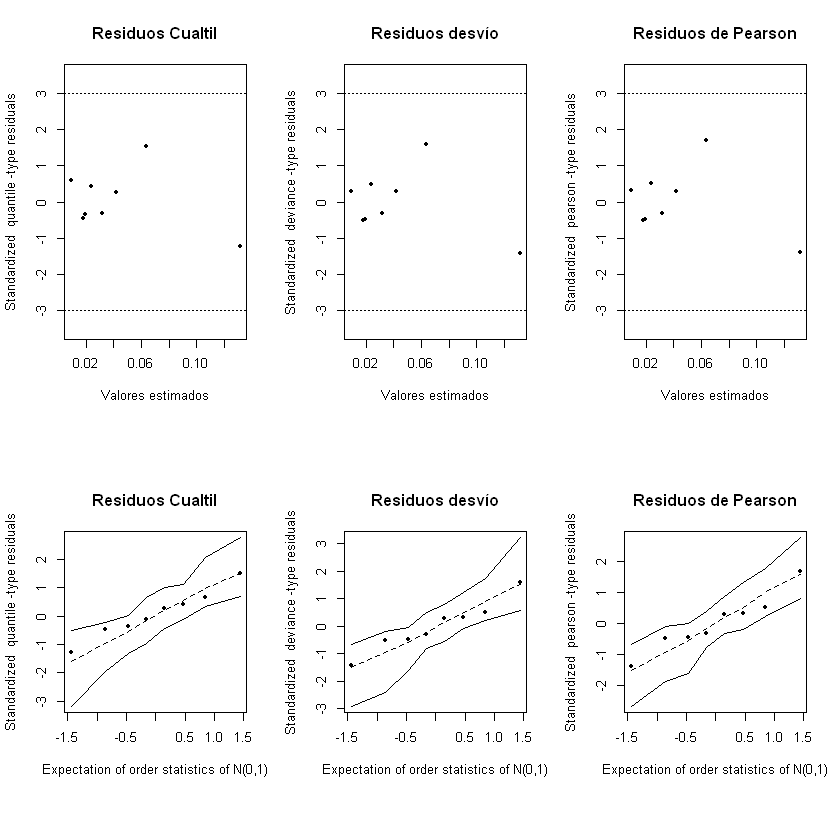

In [71]:
#Análisis Residual
par(mfrow=c(2,3))
residuals_glm(fit2, xlab = "Valores estimados")
title("Residuos Cualtil")
residuals_glm(fit2, xlab = "Valores estimados", type= "deviance")
title("Residuos desvío")
residuals_glm(fit2, xlab = "Valores estimados", type= "pearson")
title("Residuos de Pearson")
envelope_glm(fit2)
title("Residuos Cualtil")
envelope_glm(fit2, type= "deviance")
title("Residuos desvío")
envelope_glm(fit2, type= "pearson")
title("Residuos de Pearson")

El gráfico presenta los valores estimado contra los residuos cuántil, desvio, y de pearson. En este
podemos resaltar que no se presentan datos potencialmente atípicos para el caso de cáncer de higado.
Para el caso de cáncer de vejiga las siguientes gráficas indican que exiten datos potencialmente
atípicos, que corresponden a los indice 1,2 y 7.


  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


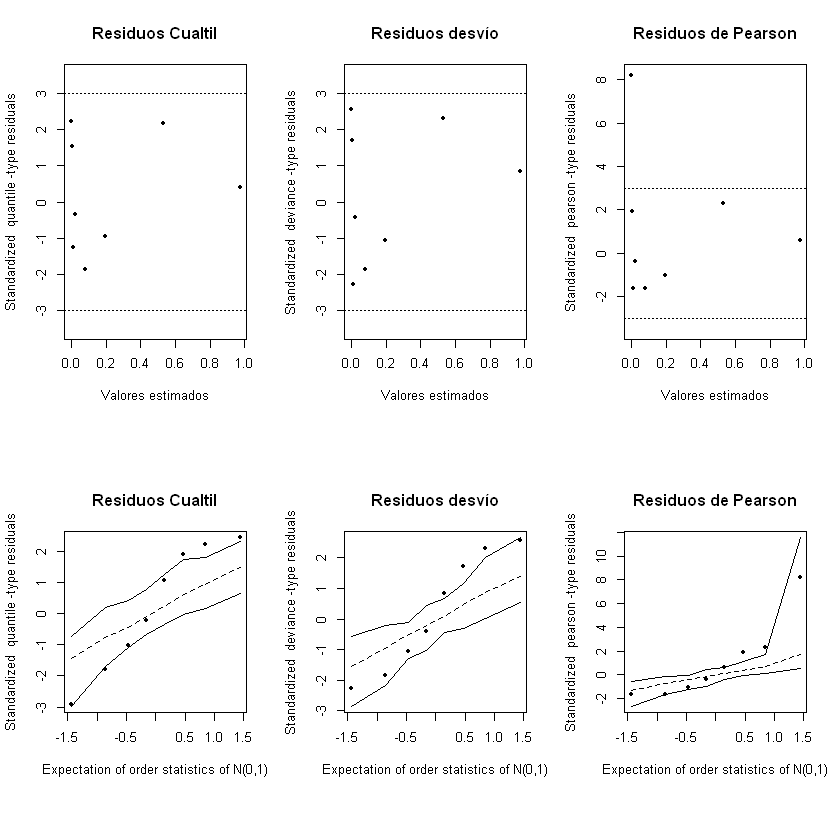

In [72]:
par(mfrow=c(2,3))
residuals_glm(fit21, xlab = "Valores estimados")
title("Residuos Cualtil")
residuals_glm(fit21, xlab = "Valores estimados", type= "deviance")
title("Residuos desvío")
residuals_glm(fit21, xlab = "Valores estimados", type= "pearson")
title("Residuos de Pearson")
envelope_glm(fit21)
title("Residuos Cualtil")
envelope_glm(fit21, type= "deviance")
title("Residuos desvío")
envelope_glm(fit21, type= "pearson")
title("Residuos de Pearson")

Por otra parte, haciendo uso de la distancia de cook, tenemos que para el modelo de cáncer de
higado, los posible valores influyentes corresponden a los indices 7 y 8. Mientras que para el modelo
de cáncer de vejida los valores influyentes corresponden a los indices 2 y 7

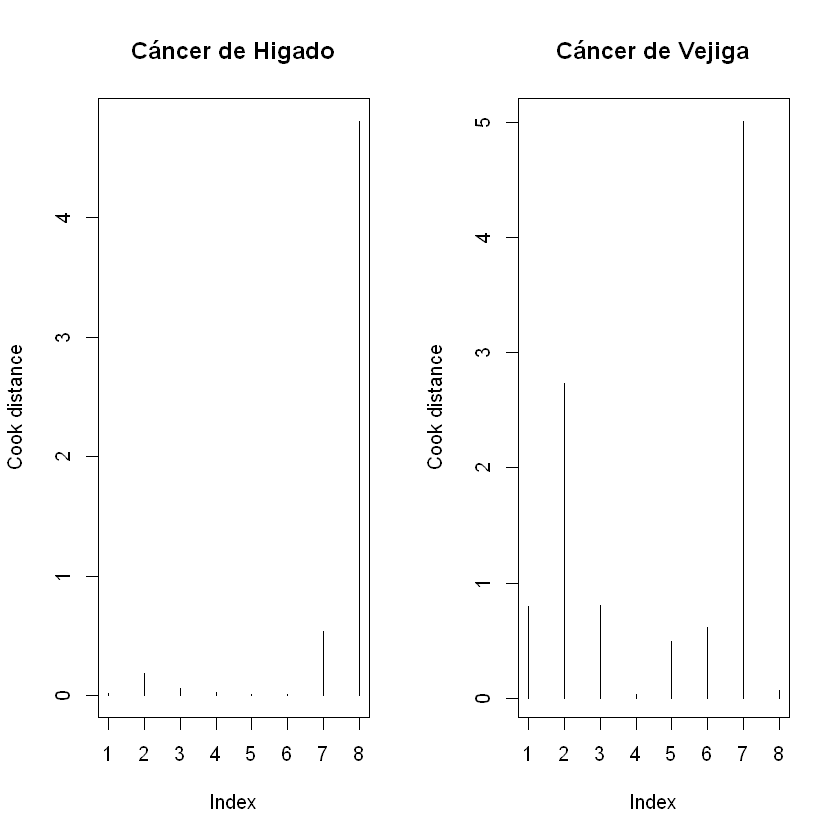

In [74]:
#Sensibilidad
par(mfrow=c(1,2))
Cookdis_glm(fit2)
title("Cáncer de Higado")
Cookdis_glm(fit21)
title("Cáncer de Vejiga")

Para cada tipo de cáncer debemos realizar la estimación de los parámetros sin las presencia de
los posibles valores influyentes, que en el caso de c. higado corresponden a los indices 7 y 8,
mientras que en c. vejiga a los indices 2 y 7. A continuación se muestra el cambio en la estimación
de los parametros a través de la instrucción case.deletion_glm(), para los indices y los modelos
anteriormente descritos. En todos los casos el parámetro sigue siendo significativo.

In [75]:
case.deletion_glm(fit2, -c(7))
case.deletion_glm(fit2, -c(8))
case.deletion_glm(fit2, -c(7,8))
case.deletion_glm(fit21, -c(2))
case.deletion_glm(fit21, -c(7))
case.deletion_glm(fit21, -c(2,7))



            Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*  Pr(>|z|)*
(Intercept)  -2.34065     0.06294          0 |  -2.33045     0.06375          0
Dosis         0.81313     0.09068          0 |   0.76222     0.09725          0
            | Change(%)
(Intercept) |     0.436
Dosis       |    -6.261

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.

            Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*  Pr(>|z|)*
(Intercept)  -2.34065     0.06294          0 |  -2.41040     0.08226          0
Dosis         0.81313     0.09068          0 |   0.98701     0.15632          0
            | Change(%)
(Intercept) |     -2.98
Dosis       |     21.38

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.

            Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*  Pr(>|z|)*
(Intercept)  -2.34065     0.06294    0.00000 |  -2.36020     0.09698    0.00000
Dosis         0.813

### Interpretación 

Dado que el modelo seleccionado corresponde a la función de enlace probit, solo es posible interpretar el signo de los parámetros. Así, en ambos casos diremos que al aumentar la dosis del
carcinógeno, se presenta un aumento en la proporción de casos de cáncer de ratones hembra

### Estimación

Estime la probabilidad que un ratón expuesto a una dosis de 2-acetilaminofluoreno de 0.6 desarrolle cáncer de hígado. Haga esta estimación “manualmente” y usando la función predict()

In [84]:
#Manualmente:
nueva_dosis <- c(1, 0.6)
beta <- as.numeric(coefficients(fit2))
mu <- t(beta)%*%nueva_dosis;mu
pnorm(mu)




-1.852777


0.0319572


In [82]:
#Con la función predict()
predict(fit2, list(Dosis=0.6) ,type="response")

1 
0.0319572